# import libaries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading the data from csv file

In [3]:
dataframe = pd.read_csv('china_gdp.csv')
dataframe.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


## Plotting the dataset

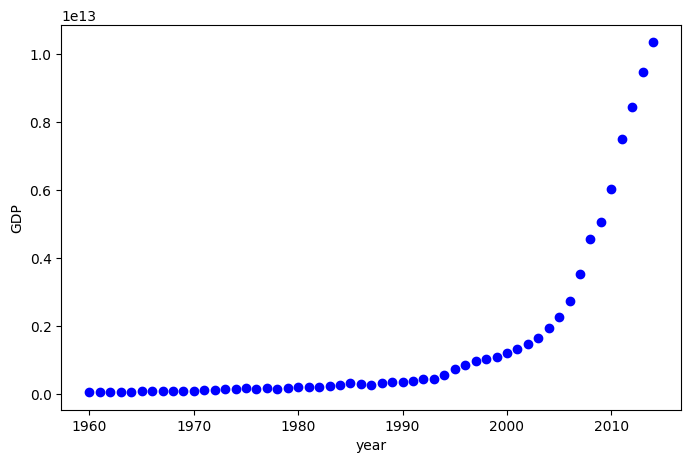

In [5]:
plt.figure(figsize=(8, 5))
x_data, y_data = (dataframe["Year"].values, dataframe["Value"].values)
plt.plot(x_data, y_data, 'bo')
plt.xlabel('year')
plt.ylabel('GDP')
plt.show()

## choosing a model

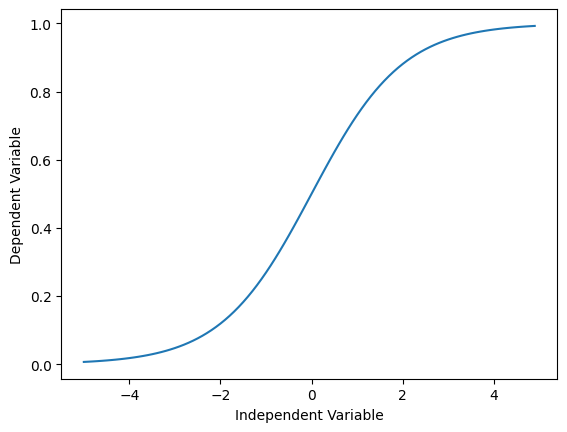

In [6]:
x = np.arange(-5.0, 5.0, 0.1)
y = 1.0 / (1.0 + np.exp(-x))

plt.plot(x, y)
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.show()

## Building The Model

In [9]:
def sigmoid(x, beta_1, beta_2):
    y = 1 / (1 + np.exp(-beta_1 * (x - beta_2)))
    return y

### Lets look at a sample sigmoid line that might fit with the data:

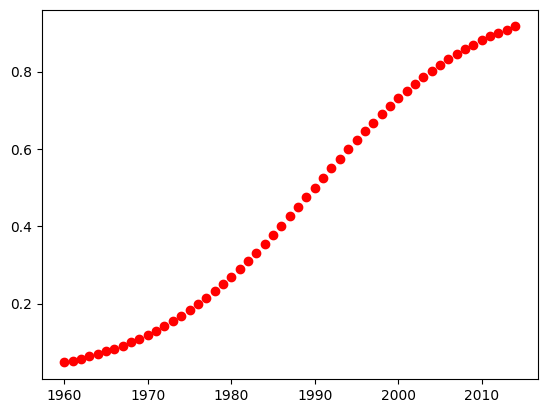

In [11]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
y_pred = sigmoid(x_data, beta_1, beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, y_pred, 'ro')
plt.show()

#### Our task here is to find the best parameters for our model. Lets first normalize our x and y:

In [12]:
xdata = x_data/max(x_data)
ydata = y_data/max(y_data)

#### find the best parameters for our fit line

In [15]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

#print the final parameters
print (" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451712, beta_2 = 0.997207


#### Now we plot our resulting regression model

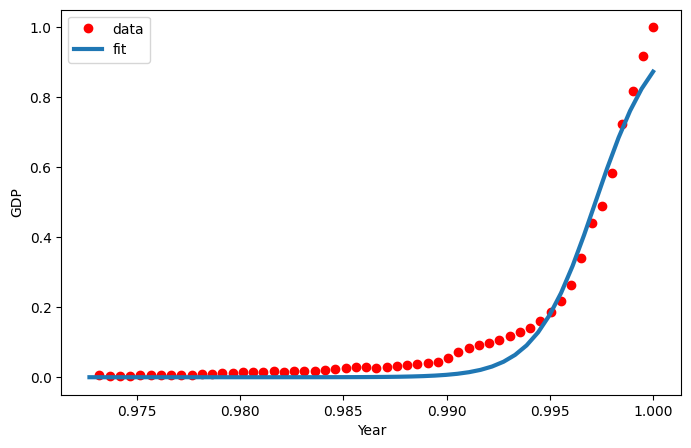

In [19]:
x = np.linspace(1960, 2015, 50)
x = x / max(x)
plt.figure(figsize=(8, 5))
y = sigmoid(x, *popt)

plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x, y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

### train and test data

In [20]:
msk = np.random.rand(len(dataframe)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# Evaluation

In [21]:
# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

C:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Mean absolute error: 0.16
Residual sum of squares (MSE): 0.11
R2-score: -16729578217944766878792548352.00
